In [1]:
# Generic imports
import pandas as pd
import plotly
import plotly.graph_objects as go

# 5G visualization logic
import trace_plotting
import logging

In [2]:
# Wireshark trace with 5GC messages
wireshark_traces = 'doc/free5gc.pcap'

In [5]:
# DEBUG loggig level for big traces so that you can see if processing is stuck or not
packets_df = trace_plotting.import_pcap_as_dataframe(
    wireshark_traces, 
    http2_ports = "32445,5002,5000,32665,80,32077,5006,8080,3000,8081",
    wireshark_version = '3.4.4',
    logging_level=logging.DEBUG)

DEBUG:root:Preparing call for Wireshark version 3.4.4
DEBUG:root:Wireshark call for doc/free5gc.pcap. Version 3.4.4, HTTP/2 ports: 32445,5002,5000,32665,80,32077,5006,8080,3000,8081
DEBUG:root:tshark path: C:\Users\jkolo\PycharmProjects\5g-trace-visualizer\wireshark\WiresharkPortable_3.4.4\App\Wireshark\tshark
DEBUG:root:Received HTTP/2 port list: 32445,5002,5000,32665,80,32077,5006,8080,3000,8081
DEBUG:root:Using Wireshark version 3.4.4
DEBUG:root:Wireshark supports nas-5gs.null_decipher option. Applying
DEBUG:root:Generating PDML files from PCAP to doc/free5gc_3.4.4.pdml
DEBUG:root:['C:\\Users\\jkolo\\PycharmProjects\\5g-trace-visualizer\\wireshark\\WiresharkPortable_3.4.4\\App\\Wireshark\\tshark', '-r', 'doc/free5gc.pcap', '-2', '-d', 'tcp.port==32445,http2', '-d', 'tcp.port==5002,http2', '-d', 'tcp.port==5000,http2', '-d', 'tcp.port==32665,http2', '-d', 'tcp.port==80,http2', '-d', 'tcp.port==32077,http2', '-d', 'tcp.port==5006,http2', '-d', 'tcp.port==8080,http2', '-d', 'tcp.port==

In [6]:
plot_data = trace_plotting.generate_scatterplots_for_wireshark_traces(packets_df, filter_column='file')[0]

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


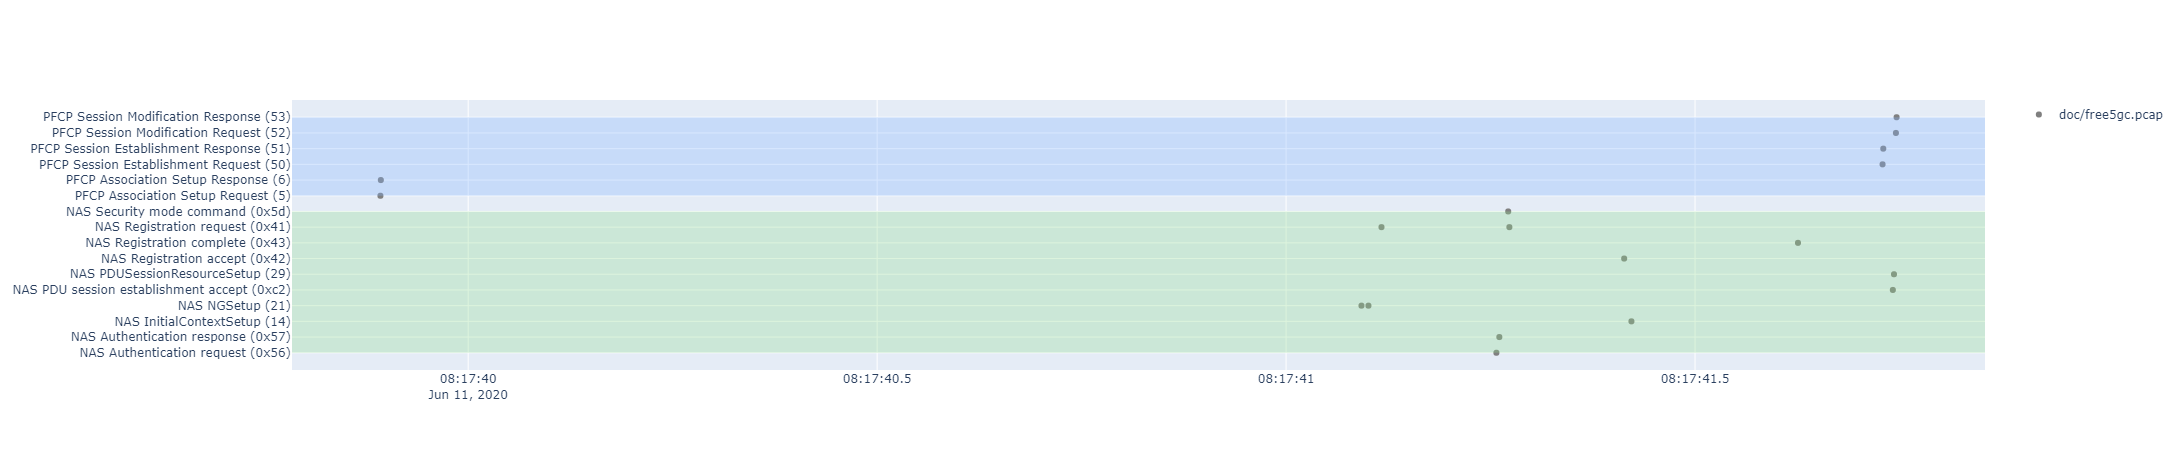

In [11]:
fig = go.Figure(data=plot_data)
fig.update_layout(shapes=trace_plotting.get_protocol_shapes(packets_df, y_axis='y'))
fig.show()
out_html = ''.join(wireshark_traces.split('.')[0:-1]) + '_pcap_plot.html'
fig.write_html(out_html)